In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [373]:
df = pd.read_excel("Eksamen-2024/Final2024.xlsx", engine = 'openpyxl', skiprows=1) #installere conda install openpyxl i terminalen 

In [374]:

df.head()

,Kandidatnr,1.1 tallsystem,1.2 Sortering,1.3 ASCII hullbånd,1.4 oblig,1.5 hvilken likning,1.6 virker koden,1.7 hva blir printet,1.8 programflyt,2.1,...,3.8,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,Grand Total
0,1,2.4,3.0,1.9,3,3,0,3,3.8,5,...,4.00,3.0,3,3,4,6,1.5,1,2,89.74
1,2,2.1,3.0,2.5,0,3,3,3,1.8,3,...,3.00,1.0,2,3,4,6,1.0,0,2,70.88
2,3,0.9,0.0,0.0,0,0,0,0,0.0,4,...,3.25,4.0,2,0,0,0,1.0,0,1,37.64
3,4,2.4,3.0,1.9,3,3,3,3,1.8,5,...,3.50,2.5,1,3,4,0,0.5,0,0,76.81
4,5,2.4,0.0,0.0,0,0,0,0,1.8,0,...,3.50,1.0,2,0,0,0,0.5,0,2,35.71


In [375]:
df['Grand Total'].count() # getting total count of entries 

np.int64(569)

In [376]:
# Creating bins and labels to divide grand total into grade segements
score_groups = [0, 40, 46, 58, 77, 92, 100]
grade_labels =['F', 'E', 'D', 'C', 'B', 'A'] 

In [377]:
pd.cut(df['Grand Total'], bins = score_groups, labels = grade_labels)

0      B
1      C
2      F
3      C
4      F
      ..
564    C
565    C
566    C
567    C
568    D
Name: Grand Total, Length: 569, dtype: category
Categories (6, object): ['F' < 'E' < 'D' < 'C' < 'B' < 'A']

In [378]:
# create a new column for grades
df['Grade'] = pd.cut(df['Grand Total'], bins = score_groups, labels = grade_labels) 

In [379]:
df['Grade'] # see the new column

0      B
1      C
2      F
3      C
4      F
      ..
564    C
565    C
566    C
567    C
568    D
Name: Grade, Length: 569, dtype: category
Categories (6, object): ['F' < 'E' < 'D' < 'C' < 'B' < 'A']

In [380]:
# counting number of items (students) per grade
df['Grade'].value_counts()

Grade
C    271
B    173
D     76
F     24
E     19
A      6
Name: count, dtype: int64

In [381]:
df['Grand Total'].min()

26.299999999999997

In [382]:
# Filter rows where grade is E
students_with_e = df[df['Grade'] == 'E']

# Get the lowest Grand Total among those
lowest_e_score = students_with_e['Grand Total'].min()

print("Lowest score with grade E:", lowest_e_score)

Lowest score with grade E: 40.12


In [383]:
#Filder row where grade is B
students_with_b = df[df['Grade'] == 'B']

#get highest grand total 
highest_b_score = students_with_b['Grand Total'].max()

print("Highest score with grade B:", highest_b_score)

Highest score with grade B: 91.99000000000001


#### Finding outliers Steps 
1- Clean data from duplicates values and take only unique value that occur once.  

2- sort them in ascending order from min to max value. 

3- Calculate Median

4- Calculate Mean

5-Finding outliers using IQR

In [384]:
#Finding outliers steps 

# Obtain unqiue scores and convert dataframes to list
total_scores= df['Grand Total'].unique().tolist() 

# First step: Sort the list in ascending order and round two digits after decimal point.
total_scores_list = [round(score,2) for score in total_scores]

# Sort in ascending order, remove duplicates using set to find unique values occur only once. 
total_scores_sorted = list(sorted(set(total_scores_list)))

print(f"final_scores_sorted{total_scores_sorted}")

final_scores_sorted[26.3, 28.28, 29.7, 30.24, 30.25, 31.13, 32.56, 32.61, 32.78, 33.82, 34.13, 35.09, 35.23, 35.71, 35.89, 36.01, 37.08, 37.59, 37.64, 37.77, 38.03, 38.22, 38.83, 39.22, 40.12, 40.39, 40.65, 40.75, 40.77, 40.88, 41.13, 41.43, 42.35, 42.5, 43.19, 43.24, 43.85, 43.87, 44.15, 44.24, 45.61, 45.68, 45.8, 46.01, 46.15, 46.52, 46.74, 46.9, 46.97, 47.09, 47.51, 47.52, 47.57, 47.73, 47.75, 48.05, 48.08, 48.1, 48.28, 48.4, 48.43, 48.71, 48.72, 48.73, 48.89, 49.43, 49.63, 49.75, 49.86, 50.11, 50.17, 50.38, 50.51, 50.62, 50.84, 51.07, 51.19, 51.4, 51.62, 51.66, 51.74, 52.48, 52.7, 52.78, 52.85, 52.86, 53.6, 53.67, 53.75, 54.08, 54.42, 54.43, 54.48, 54.49, 54.58, 54.64, 54.93, 55.14, 55.16, 55.25, 55.33, 55.71, 56.15, 56.22, 56.41, 56.58, 56.65, 56.71, 56.73, 56.99, 57.2, 57.31, 57.4, 57.59, 57.67, 57.75, 57.82, 58.01, 58.06, 58.13, 58.18, 58.25, 58.28, 58.57, 58.75, 58.82, 58.86, 58.93, 59.03, 59.12, 59.23, 59.26, 59.38, 59.46, 59.53, 59.65, 59.68, 59.7, 59.75, 59.98, 59.99, 60.0, 

In [385]:
# Second step calculate median

# Count total number of items in our total score list after cleaning
total_items = len(total_scores_sorted)
print(f"total items in the list = {total_items}")

# Given 518 is even number we follow the rule of finding median for even numbers. 
N1_indx = int(total_items/2)
N2_indx = int(total_items/2 + 1)
print(N1_indx, N2_indx)

# calculate our median index
median = round((total_scores_sorted[N1_indx] + total_scores_sorted[N2_indx]) / 2, 2)
print(f"Median = {median}")


print(total_scores_sorted[N1_indx], total_scores_sorted[N2_indx])

# or we could simply use np.median. 
# np.median(total_scores_sorted)

total items in the list = 518
259 260
Median = 70.42
70.41 70.43


In [386]:
# calcaulting the mean (avg) and round it to 2 decimal digits.
mean = round(sum(total_scores_sorted)/total_items, 2) 
print(f"mean = {mean}")

mean = 68.02


Comment: Given that mean < median this indicate our data is left skwed slightly by 2.4 points. 
However giving this slight difference it indicate balance in data.

I will continue work on finding Q1, and Q3 and IQR for finding outliers and boxplott later somewhere this week most likely.

In [387]:
# finding Q1 and Q3 to boxplot 
Q1 = round(np.percentile(total_scores_sorted,25), 2)
Q3 = round(np.percentile(total_scores_sorted, 75), 2)
print(f"Q1 = {Q1}, Q3 = {Q3}")

# calculate interquartile range IQR
IQR = round(Q3 - Q1, 2)
print(f"IQR = {IQR}")

Q1 = 59.15, Q3 = 78.43
IQR = 19.28


In [388]:
# after finding Q1, Q3 and IQR 
# time to calculate upper fence (max value) and lower fence ( min value) 
lower_fence = round(Q1 - (1.5 * IQR), 2)
upper_fence = round(Q3 + (1.5 * IQR), 2)
print(f"Minimum fence value = {lower_fence} and Maximum fence value = {upper_fence}")

Minimum fence value = 30.23 and Maximum fence value = 107.35


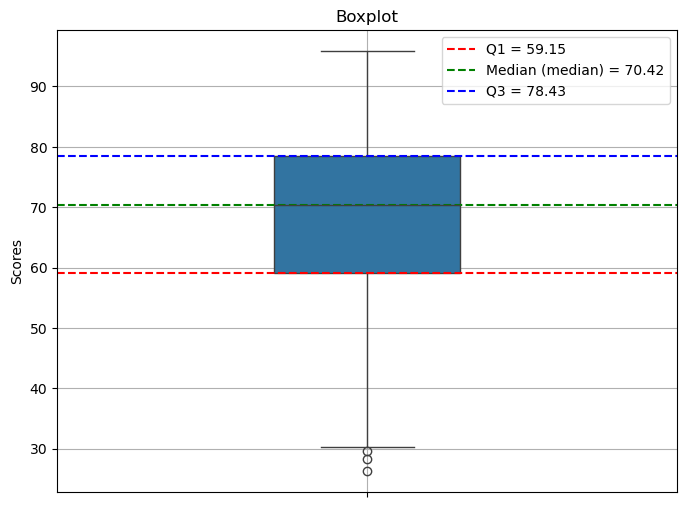

In [389]:
# Creating boxplot
plt.figure(figsize=(8,6))
sns.boxplot(total_scores_sorted, width = 0.3, orient="v")
plt.ylabel("Scores")
plt.title("Boxplot")
plt.grid(True)

# Add annotation lines
plt.axhline(Q1, color='red', linestyle='--', label=f'Q1 = {Q1}')
plt.axhline(median, color='green', linestyle='--', label= f'Median (median) = {median}')
plt.axhline(Q3, color='blue', linestyle='--', label=f'Q3 = {Q3}')

# Print legend
plt.legend()
plt.show()

Comment: 50% of our data is packed between 60-80 indicate balanced performance so majroity of scores cluster around me